<Body>   
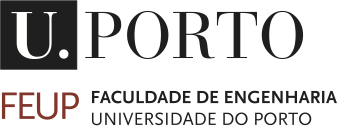   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel G. Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, April. 2023

---


# **Notebook #07: Classification (part 2)**


# k-Nearest Neighbor rule

Take a training set of pairs $\{(y_n,\mathbf{x}_n)\}_{n=1}^N$ for a $M$-class classification problem and let $k>0$ be a given integer parameter. Given a sample/pattern $\mathbf{x}$, the $k$-nearest neighbor ($k$-NN) classification rule consists in assigning $\mathbf{x}$ to the class in which the majority of its $k$ nearest training points belong to (according to a given metric).



## **Activity 1**

Consider a set of data with two features from a representative data set of points of two classes ($\omega_1$ and $\omega_2$). 

In [ ]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/evpwqery7uleqw1/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          


**1.1.** Extract the data from the data set. 


In [ ]:
# Activity 1.1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read data from file
df = pd.read_csv('data-set.csv')
npoints = df.values.shape[0]

print(df)

           X1        X2   label
0    0.641113  0.195007       1
1   -1.642258  2.807978       1
2    1.927658  0.569198       1
3    1.446395 -0.174693       1
4    3.048043  0.237330       2
..        ...       ...     ...
495  2.008408  1.898231       2
496  1.108552 -0.163538       1
497  1.068901  2.412580       2
498 -1.920007  2.571422       1
499  1.897878 -0.748237       1

[500 rows x 3 columns]


**1.1. (cont)** Plot the data from the data set. 

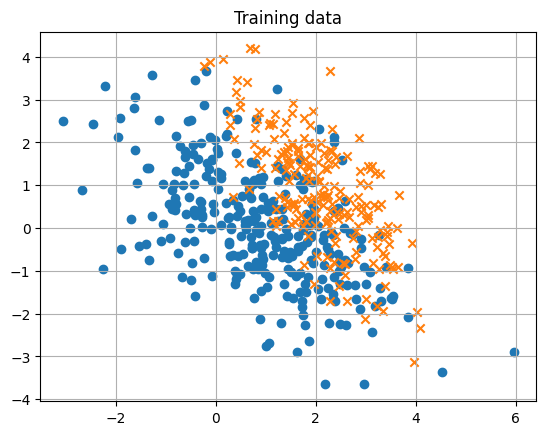

In [ ]:
# plot data
classData = df.values[:,2]
plt.figure()
plt.scatter(df.values[np.where(classData==1),0], df.values[np.where(classData==1),1], marker='o')
plt.scatter(df.values[np.where(classData==2),0], df.values[np.where(classData==2),1], marker='x')
plt.title('Training data')
plt.plot()
plt.grid()
plt.show()

**1.2** Given a pattern $\mathbf{x}$, define a function that computes the Euclidean distance to each point of the training data set.

Test your function with the pattern $\mathbf{x} = (0,0)^\top$ and plot the distances to the points of the dataset.

In [ ]:
# Activity 1.2 (to be completed)

def EuclideanDist(x, data):
  npoints = data.shape[0]
  distances = np.zeros(npoints)
  ''' to be completed 
  for i in range(npoints) :
    ...
  '''   
  return distances

x = [0,0]
dist = EuclideanDist(x,df.values)
plt.figure()
plt.scatter(range(df.values.shape[0]), dist, marker='o')
plt.plot()
plt.xlabel('dataset index')
plt.ylabel('distance')
plt.show()

**1.3** Given an integer $k>0$, a pattern, and a set of training points, define a function that classifies the pattern according to the $k$-NN rule.

Use your function to classify the pattern $\mathbf{x} = (0,0)^\top$ according to the $7$-NN rule.

In [ ]:
# Activity 1.3 (to be completed)

def kNN_classifier(k,x,data):
  npoints = data.shape[0]
  # compute distance to training points
  ''' to be completed
  dist = ...
  '''
  # sort along increasing distances
  ind = np.argsort(dist,axis=0)
  classes = data[:,2]
  classes_sorted = classes[ind]

  # determine class with more element in the k neighborhood
  c1 = 0
  c2 = 0
  ''' to be completed
  for i in range(k):
    ...
  '''

  if c1>c2:
    return 1
  else :
    return 2

x=[0,0]
k=7
print('class:',kNN_classifier(k,x,df.values))

**1.4** Consider the set of points $\{(x_1,x_2): x_1,x_2\in\{-4,-3,-2,-1,0,1,2,3,4\}\}$ and classify each of them according the $7$-NN rule. Plot the results.

In [ ]:
# Activity 1.4 (to be completed)

# define grid of points to be classified 
x1, x2 = np.meshgrid(np.arange(-4,5), np.arange(-4, 5))
X_plot = np.c_[x1.ravel(), x2.ravel()]


# classify each point of the grid
classification_kNN = []
''' to be completed
for i in range(X_plot.shape[0]):
  ...
'''

classification_kNN = np.array(classification_kNN)

# plot results
plt.figure()
plt.scatter(X_plot[np.where(classification_kNN==1),0], X_plot[np.where(classification_kNN==1),1], marker='o')
plt.scatter(X_plot[np.where(classification_kNN==2),0], X_plot[np.where(classification_kNN==2),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.xlim(x1.min()-0.5, x1.max()+0.5)
plt.ylim(x2.min()-0.5, x2.max()+0.5)
plt.grid()
plt.show()

# Logistic regression (2-class case)

Consider two classes $\omega_1$ and $\omega_2$ and let 

$$ \ln\frac{P(\omega_1|\mathbf{x})}{P(\omega_2|\mathbf{x})} = \mathbf{\theta}^\top\mathbf{x}.$$

Noting that $P(\omega_1|\mathbf{x})+P(\omega_2|\mathbf{x})=1$, and defining the threshold variable $t=\mathbf{\theta}^\top\mathbf{x}$, we have

$$ P(\omega_1|\mathbf{x}) = \sigma(t)
\quad\text{and}\quad  P(\omega_1|\mathbf{x}) = 1-\sigma(t)$$

where

$$ \sigma(t) = \frac{1}{1+e^{-t}}$$

is known as the **logistic sigmoid**.

<Body>   
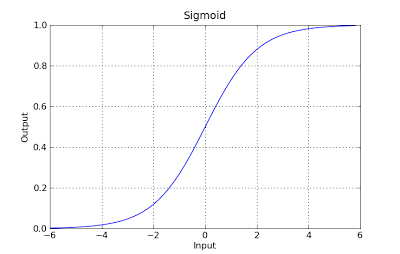

The parameter $\mathbf{\theta}$ is estimated using the **Maximum Likelihood method** applied to a set of training samples $\{(y_n,\mathbf{x}_n)\}_{n=1}^N$, where $y_n=0$ if $\mathbf{x}_n\in\omega_1$ and $y_n=1$ if $\mathbf{x}_n\in\omega_2$. The likelihood function is 

$$ P(y_1,\ldots,y_N|\mathbf{\theta}) = \prod_{n=1}^N
\left(\sigma(\mathbf{\theta}^\top\mathbf{x}_n)\right)^{y_n}
\left(1-\sigma(\mathbf{\theta}^\top\mathbf{x}_n)\right)^{1-y_n}.$$

and the negative log-likelihood is then

$$ L(\mathbf{\theta}) = \sum_{n=1}^N\left(
y_n\ln s_n + (1-y_n)\ln(1-s_n)\right) $$

where $s_n = \sigma(\mathbf{\theta}^\top\mathbf{x}_n)$.

Minimization of $ L(\mathbf{\theta})$ can be done using an iterative method such as the **gradient descent**.

Noting that

$$ \frac{d\sigma(t)}{dt} = \sigma(t)(1-\sigma(t)),$$

the gradient of the negative log-likelihood is 

$$\nabla L(\mathbf{\theta}) = \sum_{n=1}^N (s_n-y_n)\mathbf{x}_n=X^\top(s-y)$$

where

$$ X^\top = [\mathbf{x}_1,\ldots,\mathbf{x}_N],\quad
s = [s_1,\ldots,s_N],\quad y=[y_1,\ldots,y_N].$$

The gradient descent update scheme becomes

$$ \mathbf{\theta}^{(i+1)} = \mathbf{\theta}^{(i)} 
- \eta_i X^\top\left(s^{(i)}-y\right)$$
where $\eta_i>0$ is the learning rate. 


## **Activity 2**

Consider a two-dimensional class problem with two classes ($\omega_0$ and $\omega_1$), characterized by Gaussian distributions with means $\mu_1=\left(1,0\right)^\top$ and $\mu_2=\left(2,1\right)^\top$, and covariances 
$\Sigma_1 = \Sigma_2 = \left[\begin{array}{cc} 2 & -1 \\ -1 & 1\end{array}\right]$, respectively. Assume the classes are equiprobable. 

**2.1** Obtain a training set $\mathcal{X}$ and a test set $\mathcal{X}_\text{test}$, each consisting of $1000$ points from each class.


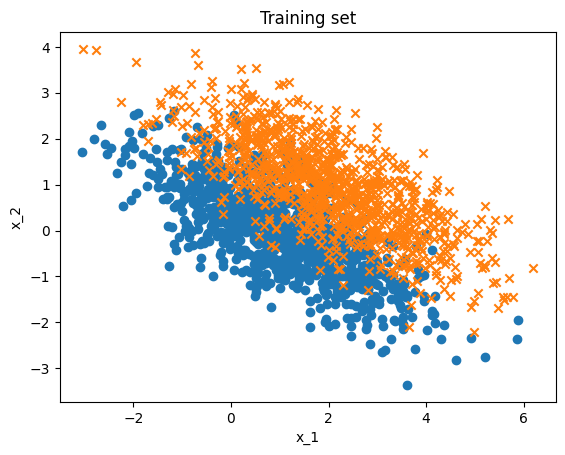

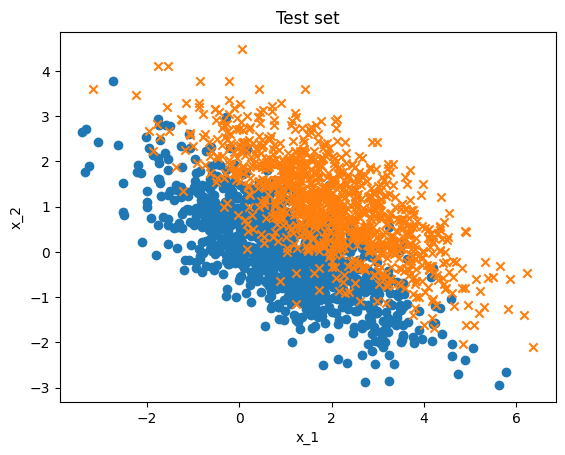

[[ 3.90333766 -1.73215595]
 [ 0.7655644   1.58256202]
 [-0.22752788  0.57822127]
 ...
 [-0.37384563  2.74388008]
 [ 1.46630906  0.9309507 ]
 [-1.77267106  4.12050268]]


In [1]:
# Activity 2.1 

import numpy as np 
import matplotlib.pyplot as plt


# multivariate gaussian distribution
def gaussian(x, mean, cov):
    n = mean.size
    d = x-mean
    np.reshape(d,[n,1])
    exp_term = -0.5 * np.transpose(d) @ np.linalg.inv(cov) @ d
    f_term = 1.0/(np.sqrt( (2*np.pi)**n * np.linalg.det(cov)))
    pdf = f_term * np.exp(exp_term)
    return pdf


# to make sure we have always the same data
np.random.seed(10)

# Distribution for class 1
mu_1 = np.array([1,0])
sigma_1 = np.array([[2,-1],[-1,1]])

# Distribution for class 2
mu_2 = np.array([2,1])
sigma_2 = np.array([[2,-1],[-1,1]])

# Generate training set
size_1 = 1000
size_2 = 1000
X_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
X_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)

size_total = size_1+size_2
Y_1 = 0*np.ones((size_1,1))
Y_2 =   np.ones((size_2,1))

# put all data together
X = np.concatenate([X_1, X_2], axis=0)
Y = np.concatenate([Y_1, Y_2], axis=0)

# plot data points
plt.title('Training set')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 1 (o)
plt.scatter(X_1[:,0], X_1[:,1], marker='o')
# Class 2 (x)
plt.scatter(X_2[:,0], X_2[:,1], marker='x')
plt.plot()
plt.show()

# Generate test set
Xtest_1 =  np.random.multivariate_normal(mu_1, sigma_1, size=size_1)
Xtest_2 =  np.random.multivariate_normal(mu_2, sigma_2, size=size_2)


# put all data together
Xtest = np.concatenate([Xtest_1, Xtest_2], axis=0)
Ytest = Y

# plot data points
plt.title('Test set')
plt.xlabel('x_1')
plt.ylabel('x_2')
# Class 0 (o)
plt.scatter(Xtest_1[:,0], Xtest_1[:,1], marker='o')
# Class 1 (x)
plt.scatter(Xtest_2[:,0], Xtest_2[:,1], marker='x')
plt.plot()
plt.show()

print(Xtest)

**2.2** Classify the points in $\mathcal{X}_\text{test}$ using the Bayesian classification rule.

In [ ]:
# Activity 2.2 (to be completed)

# A priori probabilities
P_class1 = size_1/size_total
P_class2 = size_2/size_total

# classify each data point (Bayesian classification)
classification = []
''' to be completed
for i in range(size_total):
  ...
'''

classification = np.array(classification)

# plot results
plt.figure()
plt.scatter(Xtest[np.where(classification==0),0], Xtest[np.where(classification==0),1], marker='o')
plt.scatter(Xtest[np.where(classification==1),0], Xtest[np.where(classification==1),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

**2.3** Perform logistic regression using the training set $\mathcal{X}$ to estimate the parameter
vector $\mathcal{\theta}$. Classify the points in $\mathcal{X}_\text{test}$ using the estimated parameter.

*Note: Use the gradient descent method and a learning parameter $\eta_i=0.001$. Stop iterations when $||\theta^{(i)}-\theta^{(i-1)}||_{\infty}\leq10^{-4}$.*

In [ ]:
# Activity 2.3 (to be completed)

# consider a 'bias' in the training set
Xones = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)

theta_ini = np.array([[0, 0, 0]])
error_thres = 1e-4
eta = 0.001

theta = np.copy(theta_ini)
iter = 0
error=1

while error > error_thres :
  iter += 1
  theta_old = np.copy(theta)
  ''' to be completed
  s = ...
  theta = ...
  '''
  error = np.sum(np.abs(theta-theta_old))

print(iter,theta)

# consider a 'bias' in the test set
Xtest_ones = np.concatenate([np.ones((Xtest.shape[0],1)), Xtest], axis=1)

# apply the logistic function to the test set
stest = 1 / (1 + np.exp( -Xtest_ones @ np.transpose(theta)))

# plot results
plt.figure()
plt.scatter(Xtest[np.where(stest<0.5),0], Xtest[np.where(stest<0.5),1], marker='o')
plt.scatter(Xtest[np.where(stest>=0.5),0], Xtest[np.where(stest>=0.5),1], marker='x')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

**2.4** Compare the results obtained using the two methods. Show the points that are not classified in the same way.

In [ ]:
# Activity 2.4 (to be completed)

for i in range(size_total) :
  if ''' insert condition ''' :
    print(Xtest[i],'Bayesian class is 0 and LOGREG class is 1')
  else :
    if ''' insert condition here ''' :
      print(Xtest[i],'Bayesian class is 1 and LOGREG class is 0')

**2.5** Repeat the activity now considering that $\Sigma_2 = \left[\begin{array}{cc} 2 & 1 \\ 1 & 1\end{array}\right]$.